In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import numpy as np

In [479]:
df=pd.read_csv('creditcard.csv')

In [453]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [454]:
zero=df[df['Class']==0]
one=df[df['Class']==1]

In [455]:
len(zero)

284315

In [456]:
len(one)

492

In [506]:
284315/(284315+492) # accuracy not a good metric because of unbalanced dataset

0.9982725143693799

In [480]:
df=pd.concat((one, zero[1000:3000])) # take 2000 genuine transactions

## Requirement
High TPR more important than high TNR<br>
A fraudulent transaction necessary to catch than a genuine transaction<br>
As explored earlier, transaction amount is not a good discriminating feature and will not be used

In [481]:
df=df.drop('Amount', axis=1)

In [482]:
ros = RandomOverSampler(random_state=0) # repeat minority class points - Oversampling

In [483]:
X_resampled, y_resampled = ros.fit_sample(df.drop('Class', axis=1), df['Class'])

In [484]:
df=pd.DataFrame(data=np.concatenate((X_resampled, np.reshape(y_resampled, newshape=(4000,1))), axis=1), columns=df.columns)

In [485]:
zero_resampled=df[df['Class']==0]
one_resampled=df[df['Class']==1]

In [486]:
len(zero_resampled)

2000

In [487]:
len(one_resampled)

2000

In [429]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [489]:
scaler=StandardScaler()

### Use best features observed during EDA

In [490]:
X_train, X_test, y_train, y_test = train_test_split(df[['V14', 'V10', 'V12', 'V4', 'V11', 'V3', 'V2', 'V9', 'V7', 'V6', 'V1', 'V5']], df['Class'], test_size=0.20)

In [491]:
scaler.fit(X_train) # fit to train data

StandardScaler(copy=True, with_mean=True, with_std=True)

In [492]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## KNN with 10 fold cross validation

In [465]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
neighbors=[]
accuracy=[]
for k in range(1, 3998, 2):
    model=KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree', weights='distance')
    avg_accuracy=np.mean(cross_val_score(model, X_train, y_train,cv=10))
    neighbors.append(k)
    accuracy.append(avg_accuracy)

In [494]:
%matplotlib inline
import matplotlib.pyplot as plt

(0.98562204281780108, 0.99593846741667402)

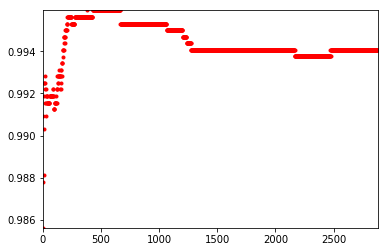

In [495]:
plt.plot( neighbors,accuracy, 'r.')
plt.xlim(np.min(neighbors), np.max(neighbors))
plt.ylim(np.min(accuracy), np.max(accuracy))

In [496]:
np.argmax(accuracy)

191

In [497]:
neighbors[np.argmax(accuracy)]

383

In [498]:
np.max(accuracy)

0.99593846741667402

In [499]:
np.min(accuracy)

0.98562204281780108

In [500]:
model_test=KNeighborsClassifier(n_neighbors=383, algorithm='kd_tree', weights='distance')

In [501]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2881, p=2,
           weights='distance')

In [502]:
predictions=model.predict(X_test)

In [503]:
from sklearn.metrics import confusion_matrix

In [504]:
C=confusion_matrix(y_test, predictions)

In [505]:
C.T

array([[419,   7],
       [  0, 374]])

In [1]:
(374)/(381)

0.9816272965879265

In [2]:
(419+374)/(419+374+7)

0.99125

TPR of 98.16% <br>
TNR of 100% <br>
Accuracy 99.12% <br>

## Conclusion
KNN works extremely well in case of credit card fraud detection